# Apply simple operations over multidimensional data

Reference notebook for the fourth task of the Climate Geospatial Analysis with Python and Xarray project on Coursera.

Instructor: Danilo Lessa Bernardineli (https://danlessa.github.io/)

---

- Welcome back! On this task, we are going to learn how to apply simple multidimensional operations, like subtracting and getting the mean. As we'll see, Xarray will allow to have an consistent experience even though we are handling several dimensions.
- So in order to start, let's open the task 4 notebook. Run the first blocks, and then open a new cell.

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [3]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 89, longitude: 142, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [4]:
temp_change = (ds.skt.sel(time = '2019-01-01') - ds.skt.sel(time = '1979-01-01'))

temp_change

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[ 1.2527466 ,  1.277832  ,  1.2758484 , ...,  0.03961182,
         0.1076355 ,  0.19018555],
       [ 1.1880188 ,  1.197937  ,  1.1669006 , ..., -0.01123047,
         0.01257324,  0.08056641],
       [ 1.0024719 ,  0.996521  ,  0.9423828 , ..., -0.04425049,
        -0.05215454, -0.00726318],
       ...,
       [-0.3295288 , -0.3163147 , -0.27075195, ...,  3.6135864 ,
         3.400299  ,  3.5396423 ],
       [-0.3942566 , -0.38238525, -0.36849976, ...,  3.4597168 ,
         3.4241028 ,  3.6142578 ],
       [-0.45632935, -0.5249939 , -0.51708984, ...,  3.402954  ,
         3.262268  ,  3.3210754 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

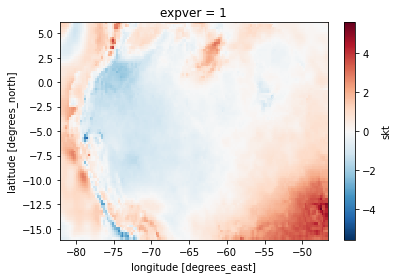

In [5]:
temp_change.plot()

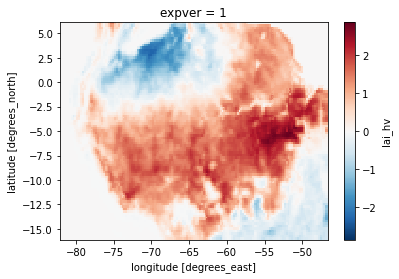

In [9]:
seasonal_change = (ds.lai_hv.sel(time = '2019-07-01') - ds.lai_hv.sel(time = '2019-01-01'))

seasonal_change.plot()

In [10]:
ds.skt.mean()

<xarray.DataArray 'skt' ()>
array(297.2683, dtype=float32)
Coordinates:
    expver   int32 1

In [11]:
mean_temp = ds.skt.mean(dim = 'time')
mean_temp

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[300.8873 , 300.82703, 300.74887, ..., 300.67136, 300.66446,
        300.68234],
       [300.84076, 300.78116, 300.67752, ..., 300.68323, 300.6837 ,
        300.6877 ],
       [300.74652, 300.67358, 300.57083, ..., 300.68448, 300.693  ,
        300.69904],
       ...,
       [293.93396, 293.92303, 293.89307, ..., 296.69812, 296.79724,
        296.8227 ],
       [293.86404, 293.85193, 293.81693, ..., 296.30548, 296.46127,
        296.48813],
       [293.79874, 293.77878, 293.74445, ..., 296.21536, 296.3526 ,
        296.1909 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

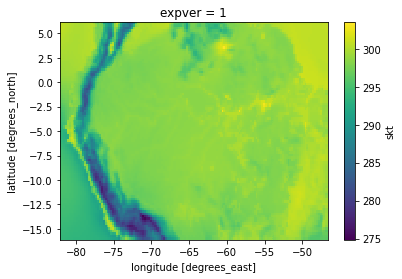

In [12]:
mean_temp.plot()

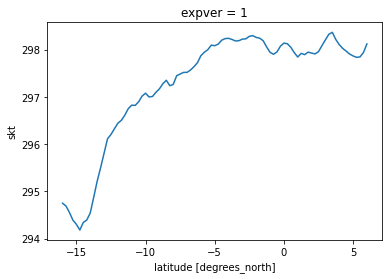

In [13]:
ds.skt.mean(dim = ['time', 'longitude']).plot()

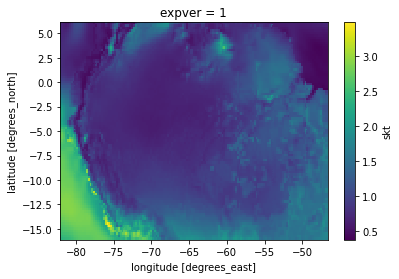

In [14]:
ds.skt.std(dim = 'time').plot()

/home/rhyme/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


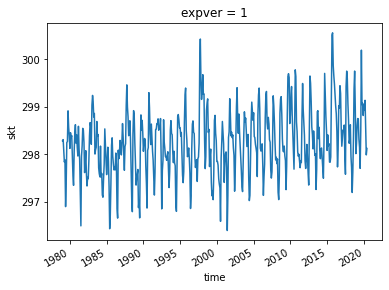

In [16]:
ds.skt.median(dim = ['latitude', 'longitude']).plot()